## 1. Manual Preprocessing

In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Libraries
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

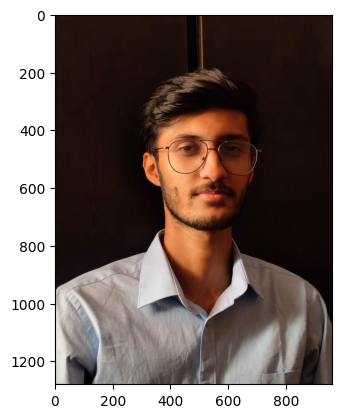

In [9]:
# OpenCV reads the image in BGR channel but what we want to work with is the RGB format so let's start converting it!
img = cv.imread('/content/drive/MyDrive/Celebrity_Faces_Dataset/_Ayan Siddiqui/WhatsApp Image 2024-11-14 at 18.21.18_ad7c689b.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [5]:
!pip install lz4
!pip install mtcnn --force-reinstall

  Using cached mtcnn-1.0.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.7 kB)
Using cached mtcnn-1.0.0-py3-none-any.whl (1.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.1 MB/s eta 0:00:00
Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Attempting uninstall: lz4
    Found existing installation: lz4 4.3.3
    Uninstalling lz4-4.3.3:
      Successfully uninstalled lz4-4.3.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: mtcnn
    Found existing installation: mtcnn 1.0.0
    Uninstalling mtcnn-1.0.0:
      Successfully uninstalled mtcnn-1.0.0


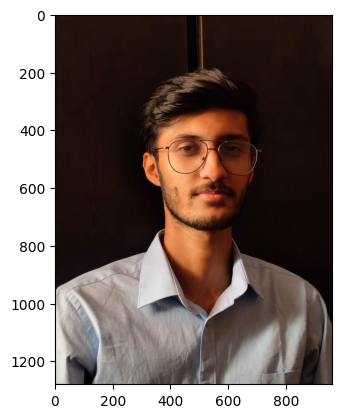

In [8]:
!pip install lz4 # Install lz4
# Import Libraries
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# OpenCV reads the image in BGR channel but what we want to work with is the RGB format so let's start converting it!
img = cv.imread('/content/drive/MyDrive/Celebrity_Faces_Dataset/_Ayan Siddiqui/WhatsApp Image 2024-11-14 at 18.21.18_ad7c689b.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# Detect the face using MTCNN
from mtcnn.mtcnn import MTCNN # Import MTCNN
detector = MTCNN() # Initialize MTCNN
results = detector.detect_faces(img) # Detect faces

In [10]:
results

[{'box': [356, 299, 332, 415],
  'confidence': 0.9999978542327881,
  'keypoints': {'nose': [549, 555],
   'mouth_right': [602, 620],
   'right_eye': [611, 460],
   'left_eye': [462, 464],
   'mouth_left': [481, 625]}}]

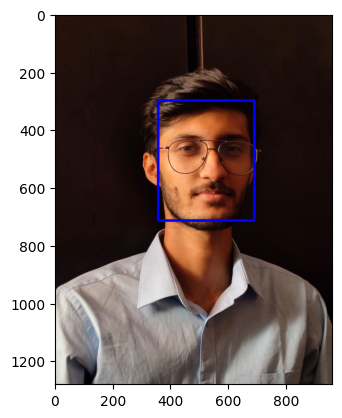

In [11]:
x, y, w, h = results[0]['box']
img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 8)
plt.imshow(img)

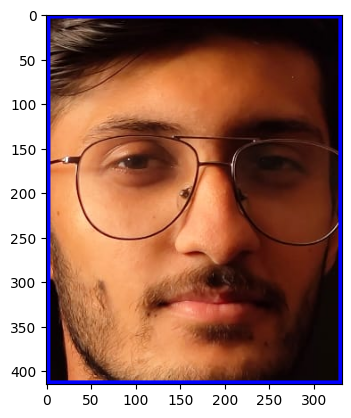

In [12]:
# Facenet only takes in 160*160 as the input!
myFace = img[y: y + h, x: x + w]
plt.imshow(myFace)

## 2. Automatic Preprocessing

In [ ]:
class FaceLoading:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160, 160)
        self.X = []
        self.y = []
        self.detector = MTCNN()

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x, y, w, h = self.detector.detect_faces(img)[0]['box']
        x, y = abs(x), abs(y)
        face = img[y: y + h, x: x + w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory + '/' + sub_dir + '/'
            FACES = self.load_faces(path)
            labels = [sub_dir] * len(FACES)
            print(f"Loaded Successfully: {len(labels)}")
            self.X.extend(FACES)
            self.y.extend([sub_dir] * len(FACES))
        return np.asarray(self.X), np.asarray(self.y)

    def plot_images(self):
        plt.figure(figsize = (18, 16))
        for num, img in enumerate(self.X):
            ncols = 3
            nrows = len(self.y) // ncols + 1
            plt.subplot(nrows, ncols, num + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

In [ ]:
faceloading = FaceLoading("/content/drive/MyDrive/Celebrity_Faces_Dataset")
X, y = faceloading.load_classes()

Loaded Successfully: 100
Loaded Successfully: 100
Loaded Successfully: 99


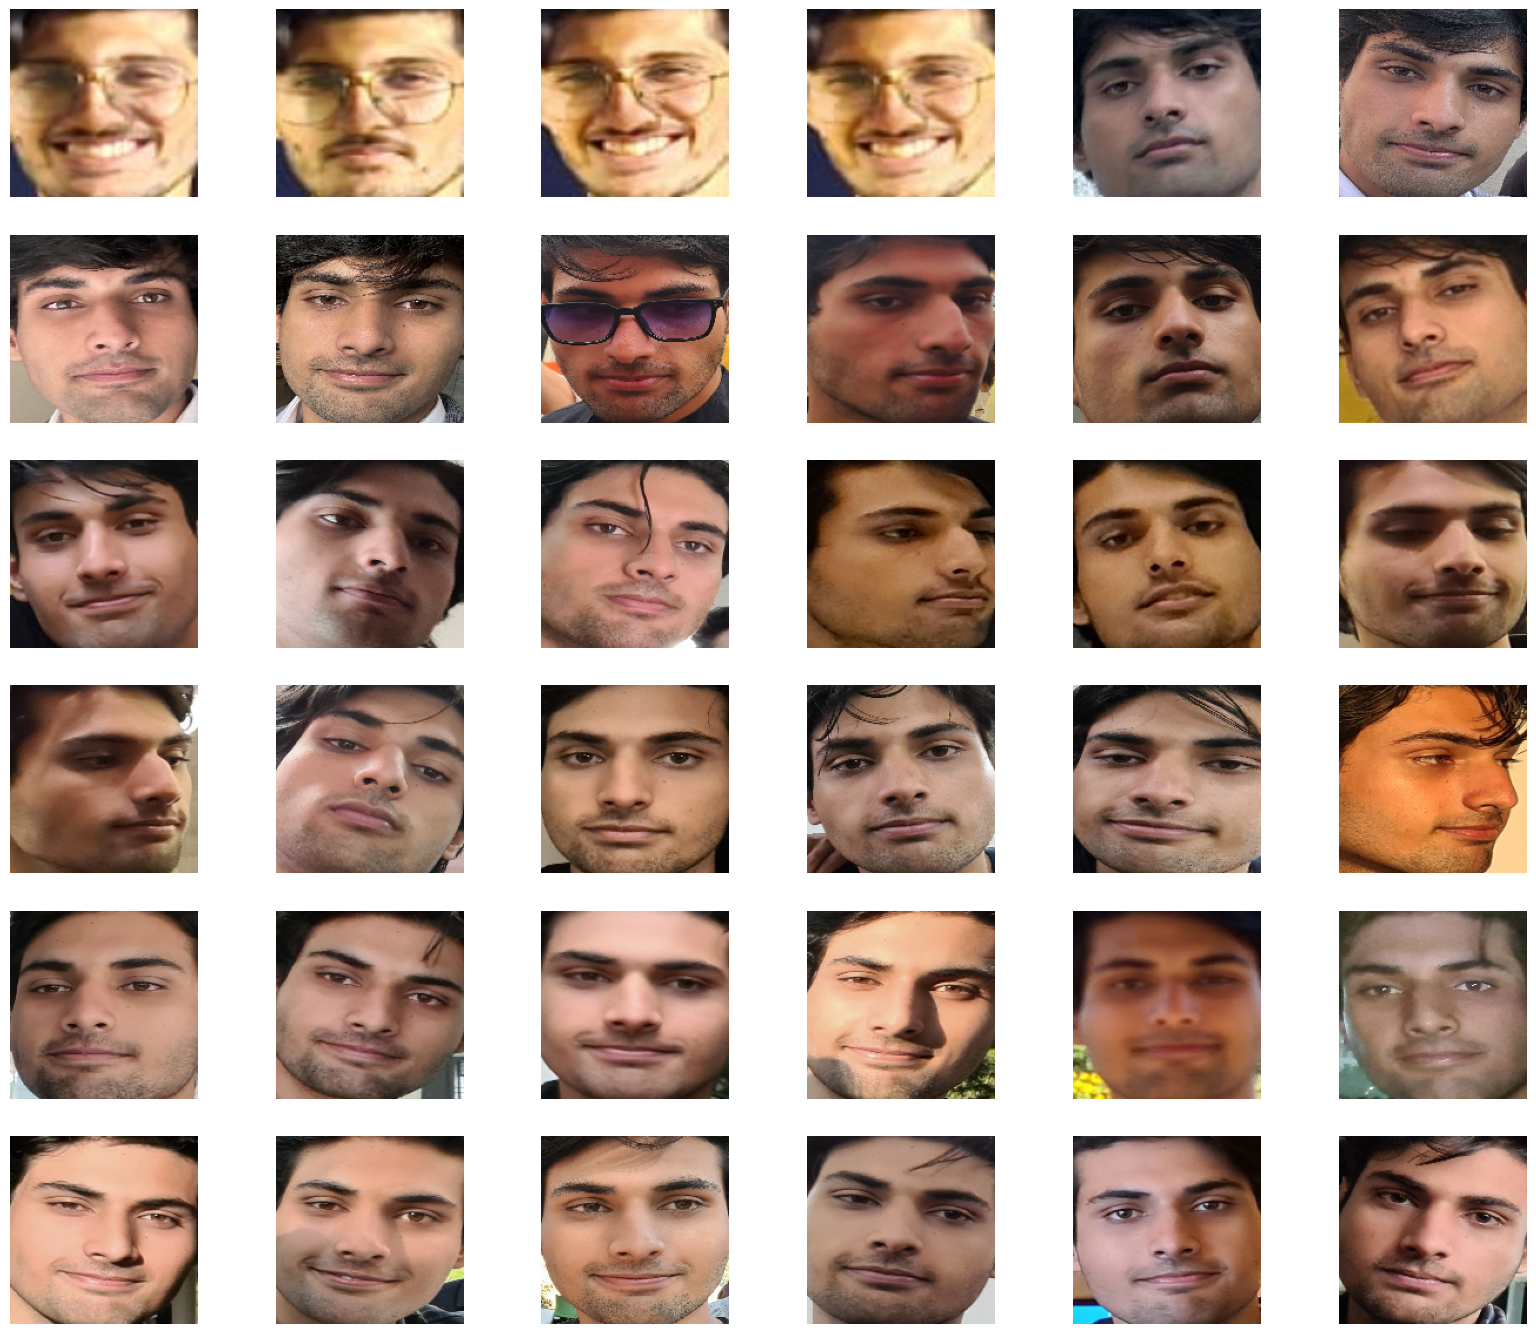

In [ ]:
plt.figure(figsize=(20, 20))  # Increase the figure size to make images larger
for num, img in enumerate(X[-36:]):  # Display only the first 36 images as an example
    ncols = 6
    nrows = len(X[:36]) // ncols + 1
    plt.subplot(nrows, ncols, num + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


## 3. FaceNet Time!

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=ab7939b6c51489ea7f798893b6cd902c5370b8c19129d0351719790e50d450fb
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embeddings(face_img):
    # 3D (160 * 160 * 3)
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)

    # 4D (None * 160 * 160 * 3)
    yhat = embedder.embeddings(face_img)

    # 512D image (1 * 1 * 512)
    return yhat[0]

In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embeddings(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━

In [ ]:
np.savez_compressed('face-embeddings-done-for-classes.npz', EMBEDDED_X, y)

## 4. SVM Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

Text(0, 0.5, '0')

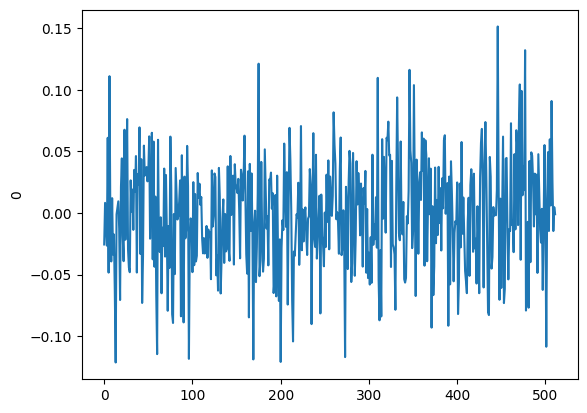

In [ ]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(y[0])

In [ ]:
y

array([ 0,  0,  0, ..., 17, 17, 17])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(EMBEDDED_X, y, shuffle=True, random_state=17)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, target_names=encoder.classes_))


Training Accuracy: 0.9922480620155039
Testing Accuracy: 0.9852320675105485

Classification Report:
                     precision    recall  f1-score   support

    Angelina Jolie       1.00      0.92      0.96        24
         Brad Pitt       1.00      1.00      1.00        24
 Denzel Washington       0.97      1.00      0.98        31
      Hugh Jackman       1.00      1.00      1.00        29
 Jennifer Lawrence       1.00      1.00      1.00        24
       Johnny Depp       1.00      0.89      0.94        18
      Kate Winslet       0.91      1.00      0.95        29
 Leonardo DiCaprio       1.00      0.96      0.98        26
         Megan Fox       0.96      1.00      0.98        26
   Natalie Portman       1.00      1.00      1.00        25
     Nicole Kidman       1.00      1.00      1.00        26
  Robert Downey Jr       1.00      0.92      0.96        24
    Sandra Bullock       1.00      1.00      1.00        29
Scarlett Johansson       0.95      1.00      0.98        41

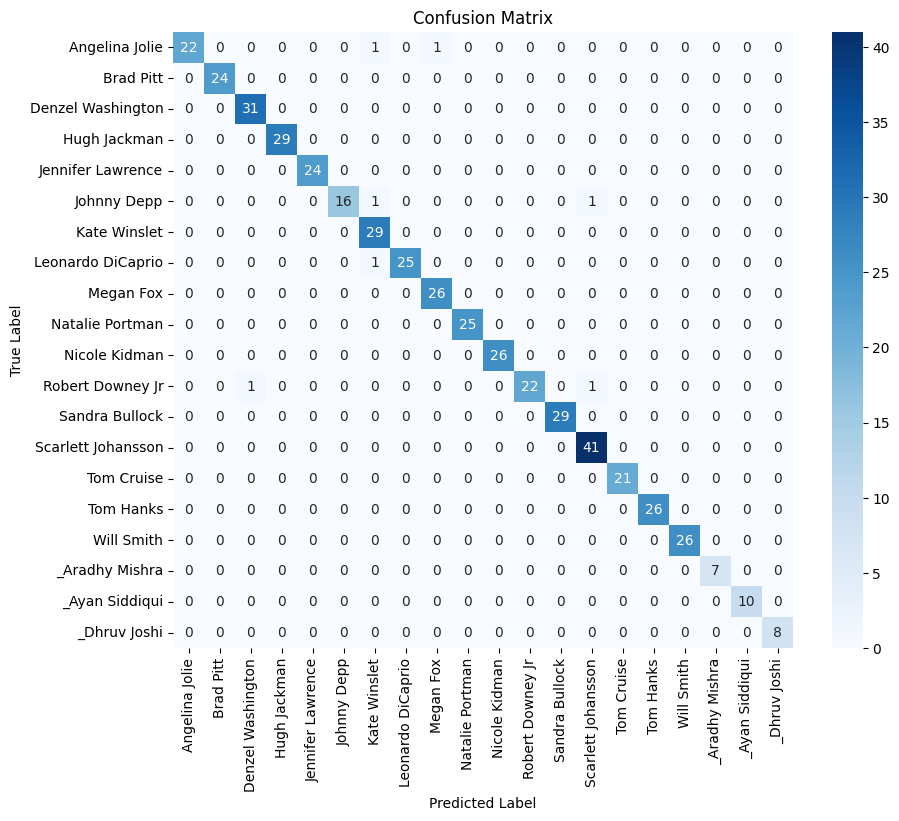

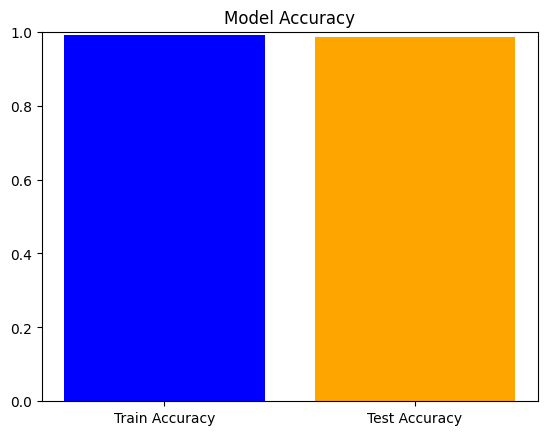

In [ ]:
# Confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Accuracy comparison
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim([0, 1])
plt.title("Model Accuracy")
plt.show()

In [ ]:
import pickle

with open('face-recognition-model.pkl', 'wb') as f:
    pickle.dump(model, f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Label: _Dhruv Joshi


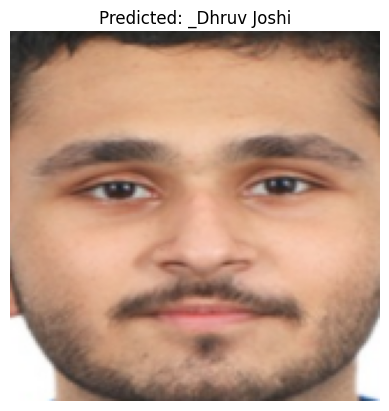

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Label: _Ayan Siddiqui


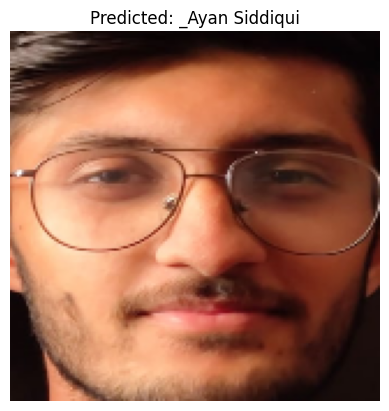

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Label: _Aradhy Mishra


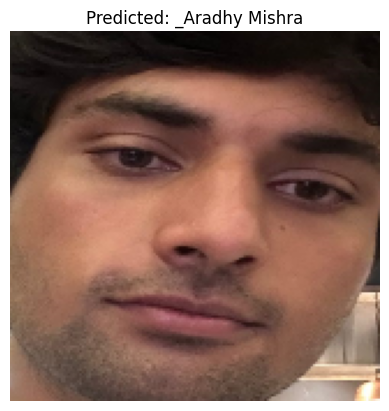

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Predicted Label: Angelina Jolie


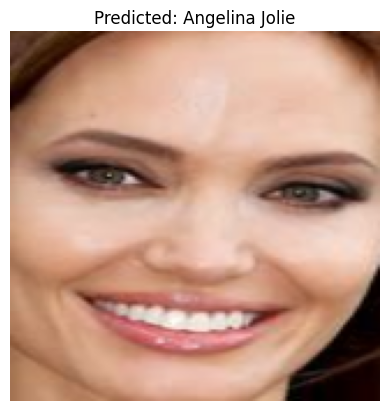

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted Label: Hugh Jackman


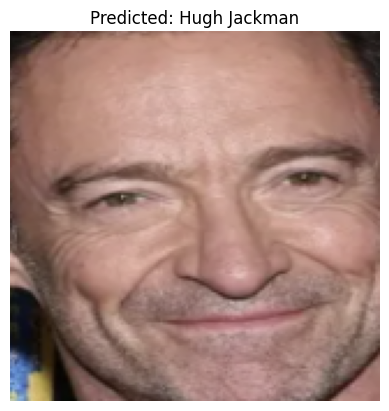

In [ ]:
def predict_face(image_path, model_path='/content/face-recognition-model.pkl'):
    # Load model
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    # Load and preprocess the image
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    detector = MTCNN()
    result = detector.detect_faces(img)

    if len(result) == 0:
        print("No face detected in the image.")
        return

    x, y, w, h = result[0]['box']
    face = img[y:y + h, x:x + w]
    face = cv.resize(face, (160, 160))

    # Get embeddings
    face_embedding = embedder.embeddings(np.expand_dims(face, axis=0))[0].reshape(1, -1)

    # Predict
    y_pred = model.predict(face_embedding)
    predicted_label = encoder.inverse_transform(y_pred)

    print(f"Predicted Label: {predicted_label[0]}")

    # Display the detected face and prediction result
    plt.imshow(face)
    plt.title(f"Predicted: {predicted_label[0]}")
    plt.axis('off')
    plt.show()

# Test the function with a new image
predict_face('/content/drive/MyDrive/Testing_FaceRec/DJ_test1.jpg')
predict_face('/content/drive/MyDrive/Testing_FaceRec/AS_test1.png')
predict_face('/content/drive/MyDrive/Testing_FaceRec/AM_test1.png')
predict_face('/content/drive/MyDrive/123.jpg')
predict_face('/content/drive/MyDrive/HJackman.png')

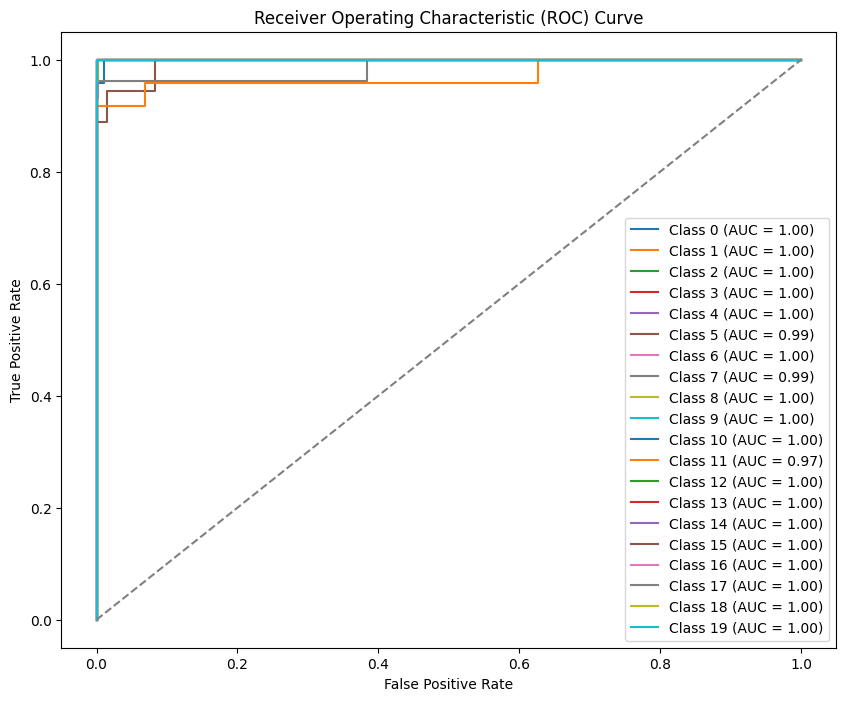

Overall AUC: 1.00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Assuming you already have:
# - X_test: Test set embeddings
# - y_test: True labels for test set
# - model: Trained SVM model

# 1. Get predicted probabilities for each class (multiclass classification)
y_pred_prob = model.predict_proba(X_test)

# 2. Convert the labels into binary format (one-hot encoding)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# 3. Initialize the plot for ROC curve
plt.figure(figsize=(10, 8))

# 4. Plot the ROC curve for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

# 5. Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 6. Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# 7. Show the plot
plt.show()

# 8. Print overall AUC for all classes
overall_auc = auc(fpr, tpr)
print(f'Overall AUC: {overall_auc:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


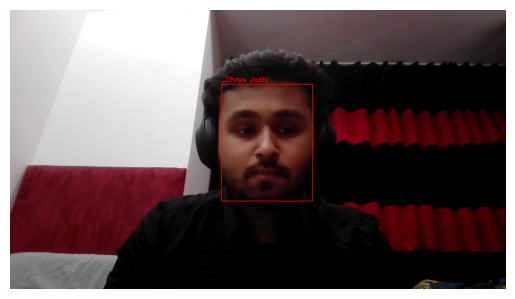

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


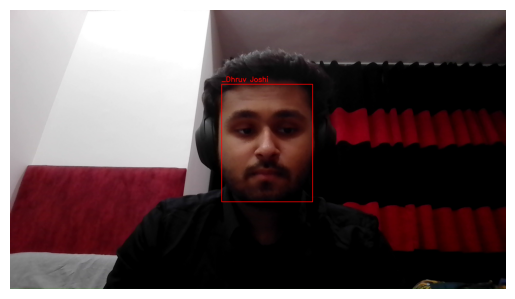

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


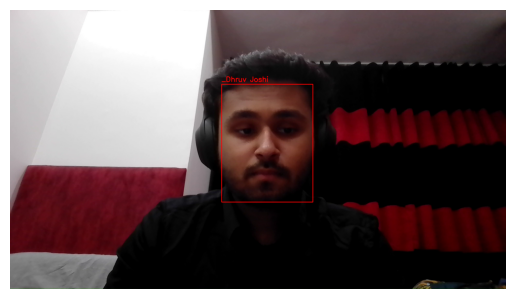

Stopped by user


In [ ]:
# Real-time Face Recognition Module (using a video file as an example)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet
import pickle

# Load the SVM model and label encoder
with open('face-recognition-model.pkl', 'rb') as f:
    model = pickle.load(f)

# Initialize MTCNN detector and FaceNet embedder
detector = MTCNN()
embedder = FaceNet()

def process_frame(frame):
    # Detect faces in the frame
    result = detector.detect_faces(frame)

    for face in result:
        x, y, w, h = face['box']

        # Extract and preprocess the face
        face_img = frame[y:y + h, x:x + w]
        face_img = cv2.resize(face_img, (160, 160))

        # Get embeddings for the face
        face_embedding = embedder.embeddings(np.expand_dims(face_img, axis=0))[0].reshape(1, -1)

        # Predict the label of the face
        y_pred = model.predict(face_embedding)
        predicted_label = encoder.inverse_transform(y_pred)

        # Draw a rectangle around the face and label it
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, predicted_label[0], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return frame

# Video capture example: Load video file for real-time-like processing
cap = cv2.VideoCapture('/content/drive/MyDrive/Testing_FaceRec/RealTimeVid/Testing_Vid_1.mp4')  # Replace with your video file path

import time  # Import time for the delay

try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert BGR (OpenCV format) to RGB for processing
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame
        processed_frame = process_frame(frame)

        # Display the frame in Colab
        plt.imshow(processed_frame)
        plt.axis('off')
        plt.show()

        # Pause for a short time to simulate real-time display
        time.sleep(0.1)  # Adjust the delay as needed for display speed in Colab

except KeyboardInterrupt:
    print("Stopped by user")

finally:
    cap.release()
